In [1]:
import os,sys
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition.pca import _assess_dimension_, _infer_dimension_

In [3]:
sys.path.append('/Users/wesleymaddox/Documents/GitHub/frequentdirections/python/')
from utils.syntheticDataMaker import SyntheticDataMaker

In [4]:
def swapped_PCA_recon(A, n_components = 'mle', return_cov = True):
    if n_components == 'mle':
        pca1 = PCA(n_components=min(A.shape))
        pca1.fit(A.T)
        n_components = _infer_dimension_(pca1.explained_variance_, pca1.n_samples_, pca1.n_features_)

    if return_cov:
        pca2 = PCA(n_components=n_components)
        pca2.fit(A)
        return np.dot(pca2.components_.T, pca2.components_), pca2.components_.shape[0]
    else:
        return n_components

In [10]:
dim_range = np.arange(50, 5000, 25)
err = np.zeros(len(dim_range))
recon_dim = np.zeros(len(dim_range))
for i, dim in enumerate(dim_range):
    data_maker = SyntheticDataMaker()
    true_signal_dimension = int(20 + np.floor(np.log(dim)))
    data_maker.initBeforeMake(dimension = dim, signal_dimension= true_signal_dimension, signal_to_noise_ratio=10.0)
    A = data_maker.makeMatrix(n = 50)

    ATA = np.dot(A.T, A)
    squared_frob_A = np.linalg.norm(A,'fro') ** 2
    
    pca_recon, dim = swapped_PCA_recon(A)
    err[i] = np.linalg.norm(ATA - pca_recon) / squared_frob_A
    recon_dim[i] = dim

/Users/wesleymaddox/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5,1,'ProbPCA Recovery of Signal Dimension \n N = 50 samples, SNR = 10')

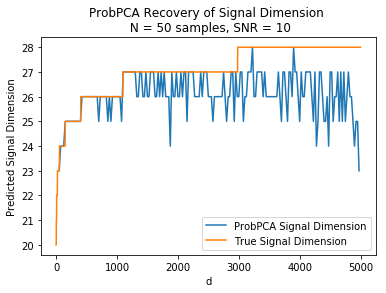

In [11]:
plt.plot(dim_range, recon_dim, label = 'ProbPCA Signal Dimension')
plt.plot(np.arange(5000), 20 + np.floor(np.log(np.arange(5000))), label = 'True Signal Dimension')
plt.xlabel('d')
plt.ylabel('Predicted Signal Dimension')
plt.legend()
plt.title('ProbPCA Recovery of Signal Dimension \n N = 50 samples, SNR = 10')

Text(0,0.5,'Normalized Reconstruction Error')

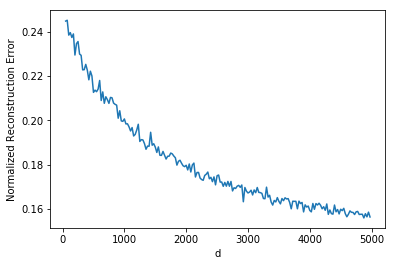

In [7]:
plt.plot(dim_range, err)
plt.xlabel('d')
plt.ylabel('Normalized Reconstruction Error')

In [12]:
dim_range = np.arange(1000, 500000, 20000)
err = np.zeros(len(dim_range))
recon_dim = np.zeros(len(dim_range))
for i, dim in enumerate(dim_range):
    #print(dim)
    data_maker = SyntheticDataMaker()
    true_signal_dimension = 40
    data_maker.initBeforeMake(dimension = dim, signal_dimension= true_signal_dimension, signal_to_noise_ratio=20.0)
    A = data_maker.makeMatrix(n = 150)

    dim = swapped_PCA_recon(A,return_cov=False)
    #err[i] = np.linalg.norm(ATA - pca_recon) / squared_frob_A
    recon_dim[i] = dim

Text(0.5,1,'ProbPCA Recovery of Signal Dimension \n N = 150 samples, SNR = 20')

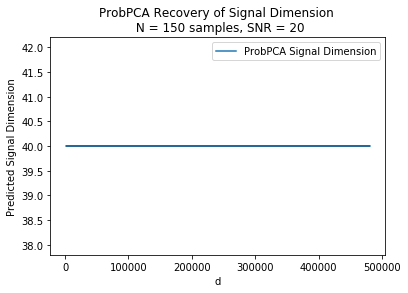

In [14]:
plt.plot(dim_range, recon_dim, label = 'ProbPCA Signal Dimension')
#plt.plot(np.arange(50000), 25., label = 'True Signal Dimension')
plt.hlines(40, xmin = np.min(dim_range), xmax = np.max(dim_range))
plt.xlabel('d')
plt.ylabel('Predicted Signal Dimension')
plt.legend()
plt.title('ProbPCA Recovery of Signal Dimension \n N = 150 samples, SNR = 20')

In [23]:
pca1 = PCA(n_components=min(A.shape))
pca1.fit(A.T)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

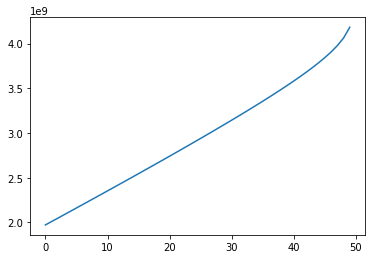

In [50]:
plt.plot(
    [_assess_dimension_(pca1.explained_variance_, rk, pca1.n_features_, pca1.n_samples_) for rk in range(50)]
)

In [4]:
data_maker = SyntheticDataMaker()
data_maker.initBeforeMake(dimension = 500, signal_dimension= 20, signal_to_noise_ratio=1000.0)
A = data_maker.makeMatrix(n = 50)

In [5]:
A.shape

(50, 500)

In [36]:
_, svds, _ = np.linalg.svd(np.cov(A))

In [37]:
svds

array([2.33233080e-01, 2.14514065e-01, 1.89979204e-01, 1.58909519e-01,
       1.42791489e-01, 1.36176159e-01, 1.20047586e-01, 1.08697465e-01,
       9.79315675e-02, 8.55566785e-02, 7.54067612e-02, 7.15129235e-02,
       6.35354418e-02, 5.48126737e-02, 5.24556487e-02, 4.35053717e-02,
       3.64018707e-02, 2.93532896e-02, 2.77005287e-02, 2.02079809e-02,
       1.43756763e-06, 1.36880316e-06, 1.30748715e-06, 1.27865289e-06,
       1.25920114e-06, 1.21734012e-06, 1.20059978e-06, 1.14444041e-06,
       1.14027098e-06, 1.08342079e-06, 1.05574804e-06, 1.02889419e-06,
       9.95763129e-07, 9.63469015e-07, 9.56641656e-07, 9.23680260e-07,
       8.98048483e-07, 8.78634675e-07, 8.72617082e-07, 8.31246441e-07,
       8.10317658e-07, 7.95355256e-07, 7.73068883e-07, 7.64764455e-07,
       7.25323234e-07, 7.07453259e-07, 6.86664524e-07, 6.30835731e-07,
       6.21664883e-07, 5.65668654e-07])

In [10]:
_infer_dimension_(eigs, n_features=A.shape[0], n_samples=A.shape[1])

ValueError: math domain error

In [12]:
nc = 50
pca1 = PCA(n_components=nc)
pca1.fit(A)

pca2 = PCA(n_components=nc)
pca2.fit(A.T)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca1.n_samples_, pca1.n_features_)
print(pca2.n_samples_, pca2.n_features_)

50 500
500 50


In [42]:
_infer_dimension_(pca1.singular_values_, n_features=pca1.n_features_, n_samples=pca1.n_samples_)

49

In [15]:
_infer_dimension_(pca2.singular_values_, n_features=pca2.n_features_, n_samples=pca2.n_samples_)

43

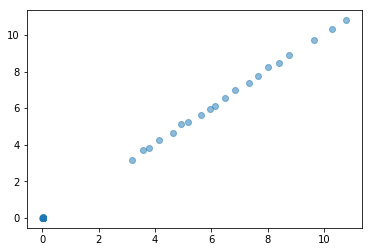

In [18]:
plt.scatter(pca1.singular_values_, pca2.singular_values_, alpha = 0.5)

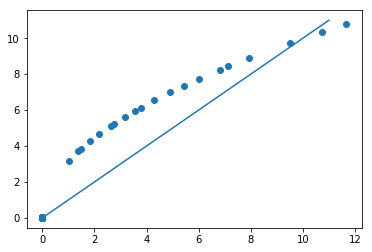

In [41]:
plt.scatter(50 * svds, pca2.singular_values_)
plt.plot(np.arange(12), np.arange(12))

In [35]:
svds.shape

(50, 50)